In [1]:
import numpy as np, scipy.integrate as si, matplotlib.pyplot as plt, math

def u(x):
    return (x - 2.0) * (x - 2.0)

def dydt(t, y):
    return k - u(t) * np.sin(y) * np.sin(y) / k

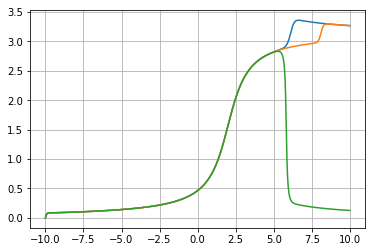

In [2]:
L = 10
delta = 0.001
L = 10

E = 0.5000001
k = pow(2 * E, 0.5)

solution = si.solve_ivp(dydt, (-L, L), [0], max_step=0.01)
plt.plot(solution.t, solution.y[0])

E = 0.5
k = pow(2 * E, 0.5)

solution = si.solve_ivp(dydt, (-L, L), [0], max_step=0.01)
plt.plot(solution.t, solution.y[0])

E = 0.499999
k = pow(2 * E, 0.5)

solution = si.solve_ivp(dydt, (-L, L), [0], max_step=0.01)
plt.plot(solution.t, solution.y[0])

plt.grid()
plt.show()

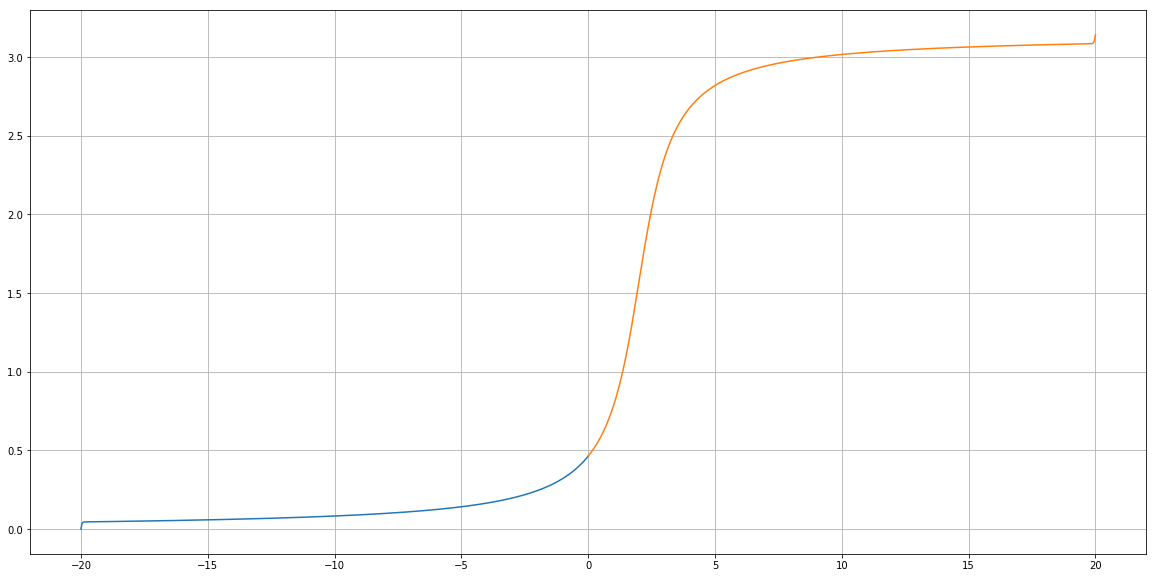

In [3]:
L = 20
n = 0

plt.figure(figsize=(20,10))

E = 0.5
k = pow(2 * E, 0.5)

solution = si.solve_ivp(dydt, (-L, 0), [0.0], max_step=0.01, method='RK45')
plt.plot(solution.t, solution.y[0])

solution = si.solve_ivp(dydt, (L, 0), [(n+1)*np.pi], max_step=0.01, method='RK45')
plt.plot(solution.t, solution.y[0])


plt.grid()
plt.show()

In [4]:
n = 0
E = 0.0
step = 0
eta = 0.2

In [5]:
L = 20
delta = 0.001

E = 0.0
for n in range(10):
    print("Starting: n =", n)
    eta = 0.2
    step = 0

    while True:
        k = pow(2 * E, 0.5)
        def dydt(t, y):
            return k - u(t) * np.sin(y) * np.sin(y) / k

        if k == 0.0:
            theta = -(n+1)*np.pi
        else:
            solution = si.solve_ivp(dydt, (-L, 0), [0.0], max_step=0.01, method='RK45')
            theta_left = solution.y[0][-1]

            solution = si.solve_ivp(dydt, (L, 0), [(n+1)*np.pi], max_step=0.01, method='RK45')
            theta_right = solution.y[0][-1]

            theta = theta_left - theta_right

        if abs(theta) < delta:
            print("Final E:", E, "theta", theta)
            break
        elif theta <= 0:
            #print("theta<=0")
            E += eta
        elif theta > 0:
            #print("theta>0")
            eta /= 2
            E -= eta
        step += 1
        #print("theta:", theta, "eta:", eta, "step:", step, "E:", E)


Starting: n = 0
Final E: 0.5000000000000001 theta 3.165800954718634e-13
Starting: n = 1
Final E: 1.5 theta 2.8399504969911504e-13
Starting: n = 2
Final E: 2.5000000000000004 theta 1.6897594434794883e-13
Starting: n = 3
Final E: 3.5000000000000013 theta 1.2945200467129325e-13
Starting: n = 4
Final E: 4.500000000000002 theta 1.1235457009206584e-13
Starting: n = 5
Final E: 5.500000000000003 theta -1.9184653865522705e-13
Starting: n = 6
Final E: 6.5000000000000036 theta 5.808686864838819e-13
Starting: n = 7
Final E: 7.500000000000004 theta 9.237055564881302e-13
Starting: n = 8
Final E: 8.500000000000004 theta 6.927791673660977e-13
Starting: n = 9
Final E: 9.5 theta 2.76667577736589e-12


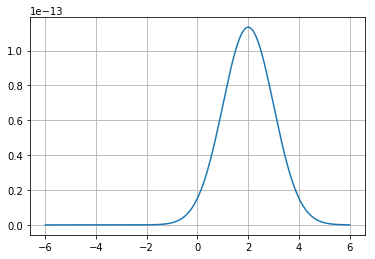

In [11]:
def V(x):
    return 0.5 * u(x)
def psi(E, L, delta_x, V):
    psi = [0.0, 1.0]
    i = 1
    while i < 2 * L // delta_x:
        i += 1
        psi.append(-psi[-2] - psi[-1] *(-2 + 2 * delta_x * delta_x * (E - V(-L + i * delta_x))))
    psi = np.array(psi)
    return psi / np.sum(delta_x * delta_x * psi * psi)
E = 0.5 + 0.0
L = 6
delta_x = 0.000005
y = psi(E, L, delta_x, V)
t = np.linspace(-L, L, num = int(2 * L // delta_x) + 1, endpoint=True)
plt.plot(t, y)
plt.grid()
plt.show()